In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(100)
def sim_random_access_eff(n_row, n_col):
    pool = np.random.randint(low=1, high=1000, size=(n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_list = []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
            ra_eff_list.append(ds_filter_ra_eff)
    ra_eff = np.reshape(ra_eff_list,(n_row, n_col))
    return ra_eff

In [4]:
ra_eff_0 = sim_random_access_eff(10,10)
ra_eff_1 = sim_random_access_eff(32,32)
ra_eff_2 = sim_random_access_eff(100,100)

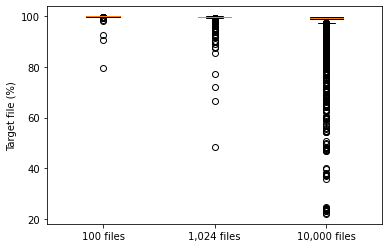

In [5]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_0.flatten(),ra_eff_1.flatten(), ra_eff_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
plt.savefig('./fig/fig_different_size_1Xto1000X.png', dpi=300, bbox_inches='tight', format='png')